# Linear Regression Example
Predicting gas milage

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import csv
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model

In [2]:
mpg = []
cylinders = []
horsepower = []
displacement = []
weight = []
acceleration = []

## MPG Dataset
Data from:  https://archive.ics.uci.edu/ml/datasets/Auto+MPG
### Fields
0. mpg: continuous 
1. cylinders: multi-valued discrete 
2. displacement: continuous 
3. horsepower: continuous 
4. weight: continuous 
5. acceleration: continuous 
6. model year: multi-valued discrete 
7. origin: multi-valued discrete 
8. car name: string (unique for each instance)

In [3]:
# Load data into arrays
with open('auto-mpg.data', 'r') as f:
    for line in f:
        fields = line.split()
        if len(fields) > 5:
            mpg.append(float(fields[0]))
            cylinders.append(float(fields[1]))
            displacement.append(float(fields[2]))
            horsepower.append(float(fields[3]))
            weight.append(float(fields[4]))
            acceleration.append(float(fields[5]))

Text(0,0.5,'mpg')

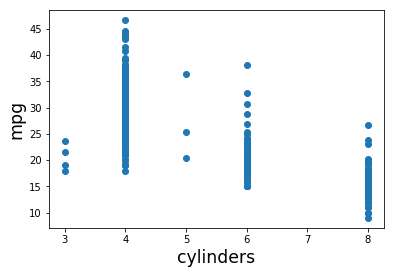

In [4]:
plt.scatter(cylinders, mpg)
plt.xlabel("cylinders", {"fontsize": "xx-large"})
plt.ylabel("mpg", {"fontsize": "xx-large"})

Text(0,0.5,'mpg')

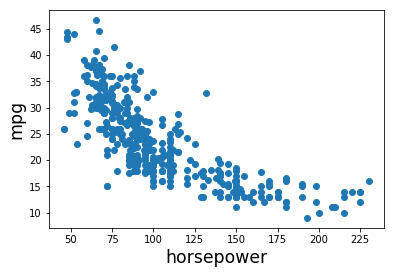

In [5]:
plt.scatter(horsepower, mpg)
plt.xlabel("horsepower", {"fontsize": "xx-large"})
plt.ylabel("mpg", {"fontsize": "xx-large"})

Text(0,0.5,'mpg')

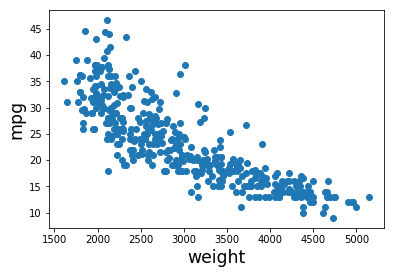

In [6]:
plt.scatter(weight, mpg)
plt.xlabel("weight", {"fontsize": "xx-large"})
plt.ylabel("mpg", {"fontsize": "xx-large"})

Text(0,0.5,'mpg')

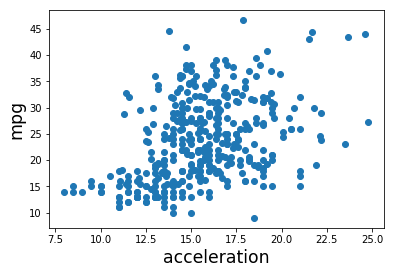

In [7]:
plt.scatter(acceleration, mpg)
plt.xlabel("acceleration", {"fontsize": "xx-large"})
plt.ylabel("mpg", {"fontsize": "xx-large"})

In [8]:
Y = np.array(mpg).reshape(-1,1)
X = np.array(weight).reshape(-1,1)
Xnorm = (X - min(X)) / (max(X) - min(X))
Ynorm = (Y - min(Y)) / (max(Y) - min(Y))
print(np.mean(Y))
print(np.mean(X))

23.445918367346938
2977.5841836734694


Cost Function: Mean Squared Error  

MSE = 1/n * sum((actual - prediction) ^ 2)

dm = 2/n * sum (-x * (actual - prediction))  
db = 2/n * sum (-1 * (actual - prediction))

In [9]:
def linear_regression(X, Y, iterations=1000, learning_rate=0.01):
    n = Y.shape[0]
    all_costs = []
    m = 0
    b = 0
    for i in range(iterations):
        h = m * X + b
        loss = np.subtract(h, Y)
        cost = np.sum(loss**2) / (2 * n)  
        all_costs.append(cost)
        m_gradient = np.sum(X * loss) / n
        b_gradient = np.sum(loss) / n
        m = m - (learning_rate * m_gradient)
        b = b - (learning_rate * b_gradient)
    return m, b, cost, all_costs, h

Slope -0.2038885494242122 Intercept 0.4526302529117854


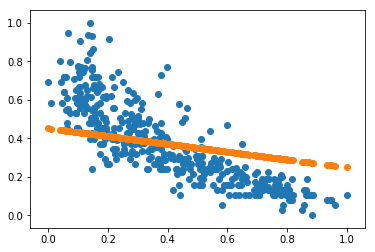

In [10]:
m, b, cost, all_cost, y_pred = linear_regression(Xnorm, Ynorm)
print("Slope", m, "Intercept", b)
plt.scatter(Xnorm, Ynorm)
plt.scatter(Xnorm, y_pred)

In [11]:
weight_model = linear_model.LinearRegression()
weight_model.fit(X,Y)

/Users/richardhall/Dev/tf3/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

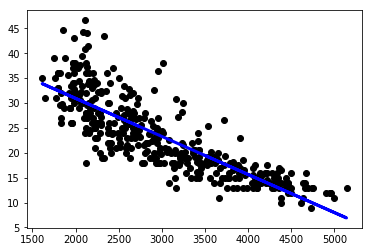

In [12]:
plt.scatter(X, Y, color='black')
plt.plot(X, weight_model.predict(X), color='blue', linewidth=3)

In [13]:
print("Rsquared", weight_model.score(X,Y))
print("coef" , weight_model.coef_)
print("intercecpt", weight_model.intercept_) 

Rsquared 0.6926304331206254
coef [[-0.00764734]]
intercecpt [46.21652455]


## Is it a good fit?
[R Squared](https://en.wikipedia.org/wiki/Coefficient_of_determination) is a measure of the accuracy of a regression model. It is the coefficient of determination. It measures the percentage of variance in the dependant variable (Y) that is explained by the independant variable(X).

Could we get a better fit, by taking more variables (features) into account?

In [14]:
Xall = np.vstack((cylinders,displacement,horsepower,weight,acceleration)).T

In [15]:
all_model = linear_model.LinearRegression()
all_model.fit(Xall, Y)
print("Results using all 5 features")
print("coeficents", all_model.coef_)
print("intercept", all_model.intercept_)
print("Rsquared", all_model.score(Xall, Y))

Results using all 5 features
coeficents [[-3.97928359e-01 -8.31301222e-05 -4.52570802e-02 -5.18691735e-03
  -2.91047140e-02]]
intercept [46.26430785]
Rsquared 0.7076926326770517


In [16]:
c = all_model.coef_
b = all_model.intercept_[0]
print("Gas milage = {0:1.3f} * cyl {1:1.8f} * disp {2:1.3f} * hp {3:1.3f} * weight {4:1.3f} * accel + {5:2.3f}"
      .format(c[0,0], c[0,1], c[0,2], c[0,3], c[0,4], b))

Gas milage = -0.398 * cyl -0.00008313 * disp -0.045 * hp -0.005 * weight -0.029 * accel + 46.264


In [17]:
Xsome = np.vstack((cylinders,horsepower,weight)).T
some_model = linear_model.LinearRegression()
some_model.fit(Xsome, Y)
print("Rsquared for cylinders, horsepower and weight:", some_model.score(Xsome, Y))

Rsquared for cylinders, horsepower and weight: 0.7076518943128077
